## OpenCV Integration Example
Note: SwiftCV package requires OpenCV installed in order to compile.

In [ ]:
%install '.package(url: "https://github.com/vvmnnnkv/SwiftCV.git", .branch("master"))' SwiftCV

Installing packages:
	.package(url: "https://github.com/vvmnnnkv/SwiftCV.git", .branch("master"))
		SwiftCV
With SwiftPM flags: []
Working in: /tmp/tmpunmxqat3
Fetching https://github.com/vvmnnnkv/SwiftCV.git
Completed resolution in 2.15s
Cloning https://github.com/vvmnnnkv/SwiftCV.git
Resolving https://github.com/vvmnnnkv/SwiftCV.git at master
Compile COpenCV imgproc.cpp
Compile COpenCV version.cpp
Compile COpenCV imgcodecs.cpp
Compile COpenCV core.cpp
Compile Swift Module 'SwiftCV' (3 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Loading library...
Installation complete!


### Imports

In [ ]:
%include "EnableIPythonDisplay.swift"
import Foundation
import Python
import TensorFlow
import SwiftCV

let plt = Python.import("matplotlib.pyplot")
let np = Python.import("numpy")
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [ ]:
// display opencv version
print(cvVersion())

4.0.1


### Utility

In [ ]:
func show_img(_ img: Mat, _ w: Int = 7, _ h: Int = 5) {
    // convert from OpenCV to Tensor
    let tens = Tensor<UInt8>(cvMat: img)!
    // and from Tensor to numpy array for matplot
    show_img(tens.makeNumpyArray(), w, h)
}

func show_img(_ img: PythonObject, _ w: Int = 7, _ h: Int = 5) {
    plt.figure(figsize: [w, h])
    plt.imshow(img)
    plt.show()
}

### Load image

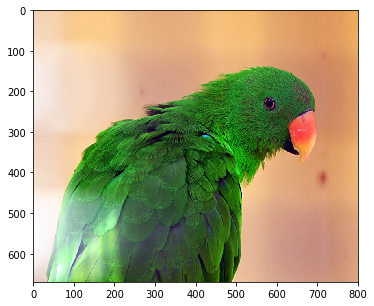

In [ ]:
// load image in memory
let url = "https://live.staticflickr.com/2842/11335865374_0b202e2dc6_o_d.jpg"
let imgContent = Data(contentsOf: URL(string: url)!)

// make opencv image
var cvImg = imdecode(imgContent)
// convert color scheme to RGB
cvImg = cvtColor(cvImg, nil, ColorConversionCode.COLOR_BGR2RGB)
show_img(cvImg)

### OpenCV Transformations

#### Resize

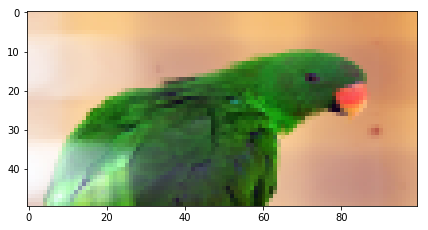

In [ ]:
show_img(
    resize(cvImg, nil, Size(100, 50), 0, 0, InterpolationFlag.INTER_AREA)
)


#### Zoom / Crop

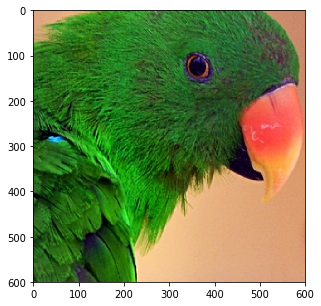

In [ ]:
let zoomMat = getRotationMatrix2D(Size(cvImg.cols, cvImg.rows / 2), 0, 2)
show_img(
    warpAffine(cvImg, nil, zoomMat, Size(600, 600))
)

#### Rotate

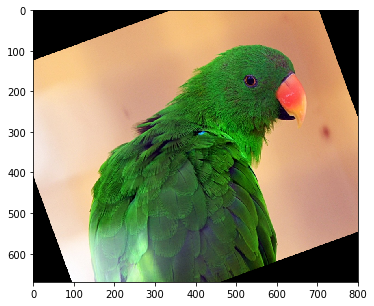

In [ ]:
let rotMat = getRotationMatrix2D(Size(cvImg.cols / 2, cvImg.rows / 2), 20, 1)
show_img(
    warpAffine(cvImg, nil, rotMat, Size(cvImg.cols, cvImg.rows))
)

#### Pad

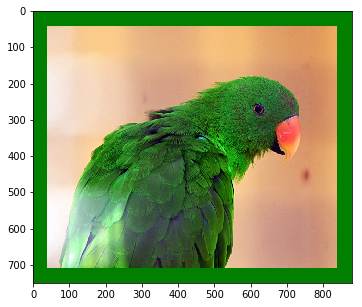

In [ ]:
show_img(
    copyMakeBorder(cvImg, nil, 40, 40, 40, 40, BorderType.BORDER_CONSTANT, RGBA(0, 127, 0, 0))
)

#### Blur

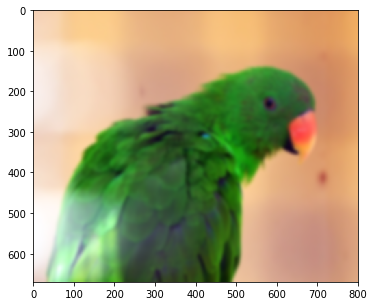

In [ ]:
show_img(
    GaussianBlur(cvImg, nil, Size(25, 25))
)

#### Flip

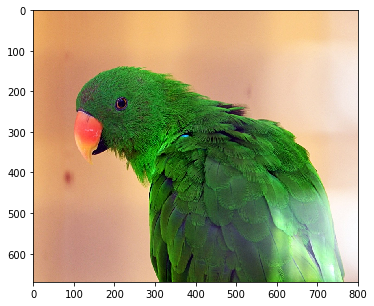

In [ ]:
show_img(
    flip(cvImg, nil, FlipMode.HORIZONTAL)
)

#### Transpose

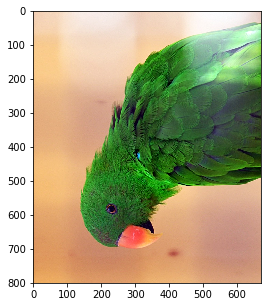

In [ ]:
show_img(
    transpose(cvImg, nil)
)

### Native S4TF Tensor Operations

#### Lightning / Contrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


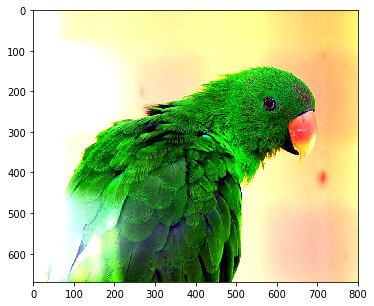

In [ ]:
// convert image to floats Tensor
var imgTens = Tensor<Float>(Tensor<UInt8>(cvMat: cvImg)!) / 255
let contr:Float = 1.8
let lightn:Float = 0.2
let mean = imgTens.mean()
imgTens = (imgTens - mean) * contr + mean + lightn
show_img(imgTens.makeNumpyArray())

#### Noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


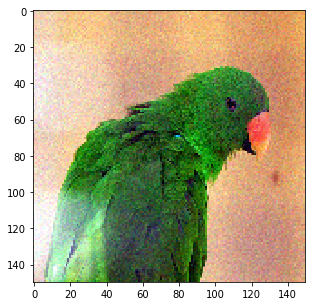

In [ ]:
// convert image to Tensor
let smallImg = resize(cvImg, nil, Size(150, 150))
var imgTens = Tensor<Float>(Tensor<UInt8>(cvMat: smallImg)!) / 255

// make white noise (slow! :))
var rng = PhiloxRandomNumberGenerator(seed: UInt64(42))
let dist = NormalDistribution<Float>(mean: 0, standardDeviation: 0.05)
var random: [Float] = []
for _ in 0..<imgTens.shape.contiguousSize {
    random.append(dist.next(using: &rng))
}
let randTens = Tensor<Float>(shape: imgTens.shape, scalars: random)

imgTens += randTens
show_img(imgTens.makeNumpyArray())